In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df=pd.read_csv("Bigdata.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.isnull().sum()
#we can observe null values in "Item_Weight" and "Outlet_Size"

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df.shape

(8523, 12)

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
dtype: int64

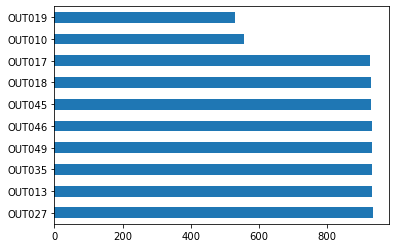

In [6]:
df["Outlet_Identifier"].value_counts().plot(kind='barh')
df.groupby("Outlet_Identifier").size()

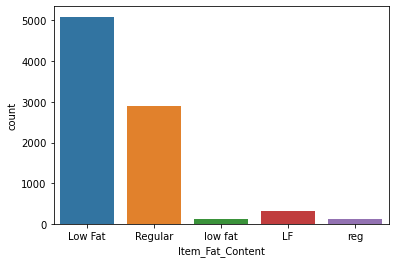

In [7]:
sns.countplot(df.Item_Fat_Content)

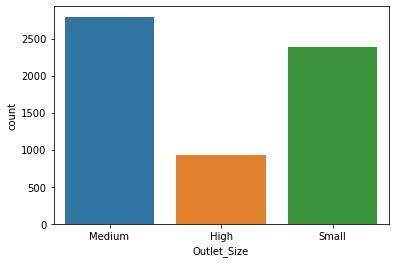

In [8]:
#for Outlet_Size
sns.countplot(df.Outlet_Size)

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
dtype: int64

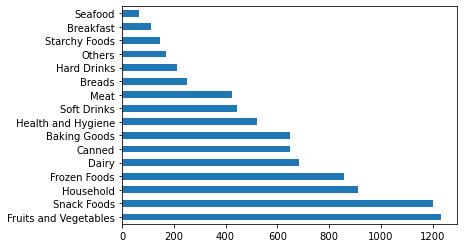

In [9]:
df["Item_Type"].value_counts().plot(kind='barh')
df.groupby("Item_Type").size()

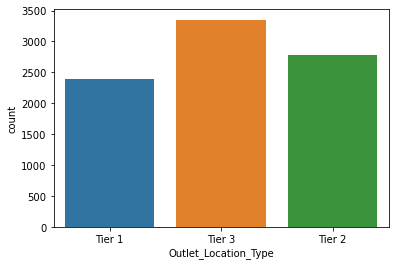

In [10]:
sns.countplot(df.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

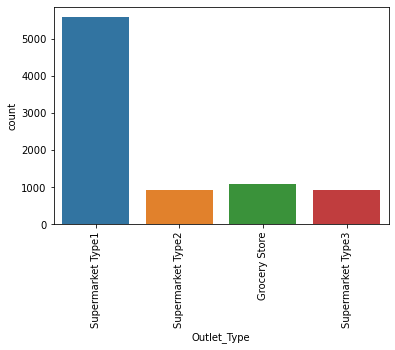

In [11]:
sns.countplot(df.Outlet_Type)
plt.xticks(rotation=90)

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


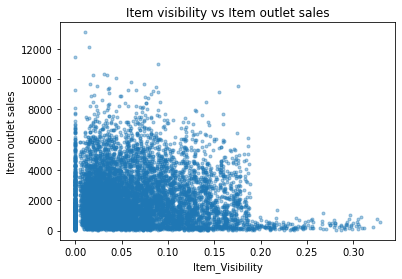

In [13]:
plt.xlabel('Item_Visibility')
plt.ylabel('Item outlet sales')
plt.title('Item visibility vs Item outlet sales')
plt.plot(df.Item_Visibility,df.Item_Outlet_Sales,'.',alpha= 0.4)

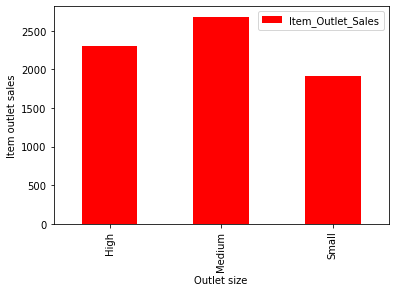

In [14]:
#impact of outlet size on sales
Outlet_size_pivot = df.pivot_table(index='Outlet_Size',values='Item_Outlet_Sales')
Outlet_size_pivot.plot(kind = 'bar',color = 'red', )
plt.xlabel('Outlet size')
plt.ylabel('Item outlet sales')
plt.show()

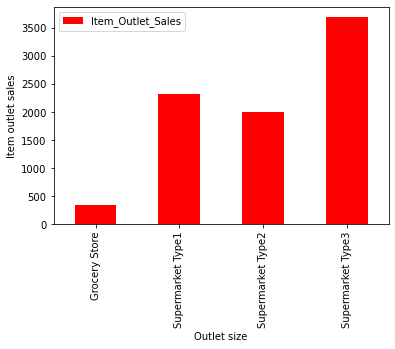

In [15]:
#impact of outlet Type on sales
Outlet_size_pivot = df.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')
Outlet_size_pivot.plot(kind = 'bar',color = 'red', )
plt.xlabel('Outlet size')
plt.ylabel('Item outlet sales')
plt.show()

In [16]:
#Filling Null Values with the mode of the Data
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [17]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].dropna().mean())

In [18]:
#Converting Year into No of years of existance :Duration
df["Duration"] = df["Outlet_Establishment_Year"].apply(lambda i:2021 - i)
df["Duration"]= df["Duration"].astype("float")

In [19]:
df.drop(["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis=1, inplace =True)

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Type","Outlet_Size"]] = df[["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Type","Outlet_Size"]].apply(le.fit_transform)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Duration
0,9.300,1,0.016047,4,249.8092,1,0,1,3735.1380,22.0
1,5.920,2,0.019278,14,48.2692,1,2,2,443.4228,12.0
2,17.500,1,0.016760,10,141.6180,1,0,1,2097.2700,22.0
3,19.200,2,0.000000,6,182.0950,1,2,0,732.3800,23.0
4,8.930,1,0.000000,9,53.8614,0,2,1,994.7052,34.0
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,2778.3834,34.0
8519,8.380,2,0.046982,0,108.1570,1,1,1,549.2850,19.0
8520,10.600,1,0.035186,8,85.1224,2,1,1,1193.1136,17.0
8521,7.210,2,0.145221,13,103.1332,1,2,2,1845.5976,12.0


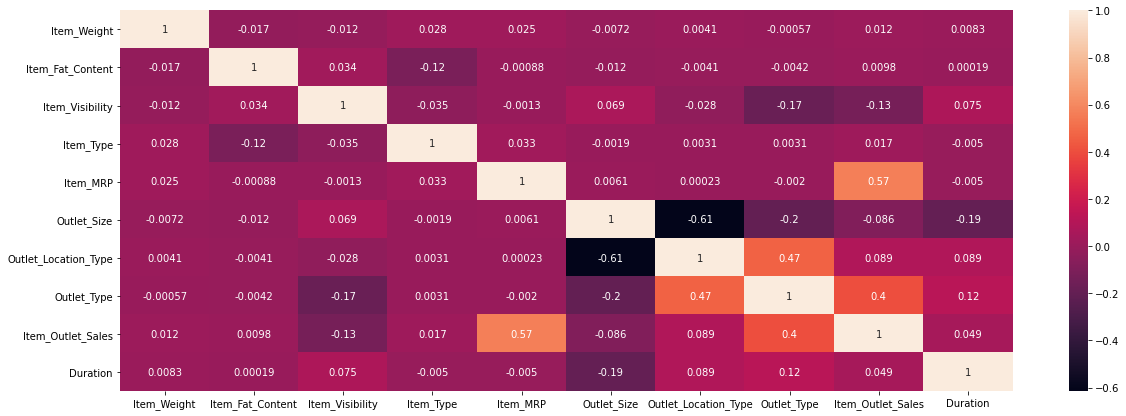

In [21]:
corr_hmap= df.corr()
plt.figure(figsize=(20,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Item MRP will have effect on outlet sales 

In [22]:
df.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Duration                0
dtype: int64

In [23]:
y=df["Item_Outlet_Sales"]
x=df.drop("Item_Outlet_Sales", axis=1)
num_folds = 10
seed = 491
scoring = 'neg_mean_squared_error'

We can go ahead with model building 

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [25]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 491 The model Perfomes very well
Training r2_score is: 50.770357542481214
Testing r2_score is: 50.77303008861336
At random state 595 The model Perfomes very well
Training r2_score is: 50.779303642725225
Testing r2_score is: 50.78495018125741


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=595)

In [27]:
models= [
    ("Lasso",Lasso()),
    ("Linear Regression",LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Ridge Regression",Ridge()),
    ("KNearest Neighbors",KNeighborsRegressor(1)),
    ("SVR",SVR())
    ]

In [28]:
Lr = LinearRegression(normalize=True)
Lr.fit(x_train,y_train)
y_pred = Lr.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.507849501812574


In [29]:
ls = Lasso()
ls.fit(x_train,y_train)
y_pred = ls.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.5078124752461124


In [30]:
Rf = RandomForestRegressor()
Rf.fit(x_train,y_train)
y_pred = Rf.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.5680080157485942


In [31]:
rd =Ridge()
rd.fit(x_train,y_train)
y_pred = rd.predict(x_test)
R2 = r2_score(y_test,y_pred)
print("r2 score is :",R2)

r2 score is : 0.5078507435607177


Among the four mobels that we have tested "RandomForestRegressor" perfomes the best with 57% Accuracy 

We can go ahead with Hyperparameter Tuning

In [ ]:
parameters={"criterion":["mae"],"n_estimators":[100,200,300]}
rf = RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [ ]:
rf = RandomForestRegressor(criterion='mae', n_estimators= 300)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred = rf.predict(x_test)

rfs = r2_score(y_test,y_pred)
print("r2 score is :",rfs*100)

rfscore=cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print("Cross value Score:",rfc)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Random Forest Regressor",fontsize=18)
plt.show()

In [ ]:
model = RandomForestRegressor(criterion='mae', n_estimators= 300)
model.fit(x_train, y_train)

In [ ]:
import joblib
joblib.dump(model,"BigMart.pkl")